In [5]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import requests
from pandas import json_normalize

url = 'https://api.spacexdata.com/v4/launches'

try:
    # GET request
    response = requests.get(url)
    response.raise_for_status()  
    data = response.json()  
    
    df = json_normalize(data)
    print("Dataframe/n",df)
    
except requests.exceptions.HTTPError as http_err:
    print(f"HTTP Error : {http_err}")
except requests.exceptions.ConnectionError as conn_err:
    print(f"Connection Error aaya: {conn_err}")
except requests.exceptions.Timeout:
    print("Request timeout ho gaya")
except requests.exceptions.RequestException as req_err:
    print(f"Kuch aur error aaya: {req_err}")
except ValueError as val_err:
    print(f"JSON parsing mein error: {val_err}")


Dataframe/n          static_fire_date_utc  static_fire_date_unix    net  window  \
0    2006-03-17T00:00:00.000Z           1.142554e+09  False     0.0   
1                        None                    NaN  False     0.0   
2                        None                    NaN  False     0.0   
3    2008-09-20T00:00:00.000Z           1.221869e+09  False     0.0   
4                        None                    NaN  False     0.0   
..                        ...                    ...    ...     ...   
200                      None                    NaN  False     NaN   
201                      None                    NaN  False     NaN   
202                      None                    NaN  False     NaN   
203                      None                    NaN  False     NaN   
204                      None                    NaN  False     NaN   

                       rocket success  \
0    5e9d0d95eda69955f709d1eb   False   
1    5e9d0d95eda69955f709d1eb   False   
2    5e9d0d9

In [5]:
df

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,None,[],None,[],[],...,None,None,[],[],None,None,None,None,None,NaN
201,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,None,[],None,[],[],...,None,None,[],[],None,None,None,None,None,NaN
202,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,None,[],None,[],[],...,None,None,[],[],None,None,None,None,None,NaN
203,None,NaN,False,NaN,5e9d0d95eda69974db09d1ed,None,[],None,[],[],...,None,None,[],[],None,None,None,None,None,NaN


In [7]:
# Launchpad se locations nikaal lo
launchpads = requests.get("https://api.spacexdata.com/v4/launchpads").json()

# ID → (latitude, longitude) dictionary
launchpad_locations = {
    pad['id']: (pad['latitude'], pad['longitude']) for pad in launchpads
}


In [9]:
import requests
from datetime import datetime
import pandas as pd

# Weather fetch karne ka function
def get_weather(lat, lon, launch_datetime_str):
    dt = datetime.fromisoformat(launch_datetime_str.replace("Z", "+00:00"))  # datetime object banao
    date = dt.date()           # Sirf date nikaalo
    hour = dt.hour             # Hour bhi nikaalo (exact launch time k liye)
    time_key = f"{date}T{hour:02d}:00"  # Time string format jese "2020-12-19T17:00"

    # Open-Meteo archive API URL banao
    url = (
        f"https://archive-api.open-meteo.com/v1/archive?"
        f"latitude={lat}&longitude={lon}&start_date={date}&end_date={date}"
        f"&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m"
    )

    try:
        # Request bhejna aur response check karna
        res = requests.get(url, timeout=10)
        res.raise_for_status()  # Error aaye to raise kare
        data = res.json()

        # Us exact hour ka index find karo
        idx = data["hourly"]["time"].index(time_key)

        # Required weather values return karo
        return {
            "temp": data["hourly"]["temperature_2m"][idx],
            "humidity": data["hourly"]["relative_humidity_2m"][idx],
            "wind_speed": data["hourly"]["wind_speed_10m"][idx]
        }

    except Exception as e:
        print(f"Error fetching weather for {launch_datetime_str}: {e}")
        return {"temp": None, "humidity": None, "wind_speed": None}


In [14]:
weather_data = []

for _, row in df.iterrows():
    launch_time = row["date_utc"]
    pad_id = row["launchpad"]

    if pad_id in launchpad_locations:
        lat, lon = launchpad_locations[pad_id]  # Tuple se latitude, longitude lo
        weather = get_weather(lat, lon, launch_time)
    else:
        weather = {"temp": None, "humidity": None, "wind_speed": None}

    weather_data.append(weather)

weather_df = pd.DataFrame(weather_data)
df = pd.concat([df.reset_index(drop=True), weather_df], axis=1)


In [16]:
print(df[['name', 'date_utc', 'temp', 'humidity', 'wind_speed']].head())

          name                  date_utc  temp  humidity  wind_speed
0    FalconSat  2006-03-24T22:30:00.000Z  26.4        77        33.9
1      DemoSat  2007-03-21T01:10:00.000Z  27.4        80        32.7
2  Trailblazer  2008-08-03T03:34:00.000Z  27.2        79        22.0
3       RatSat  2008-09-28T23:15:00.000Z  26.9        83        20.3
4     RazakSat  2009-07-13T03:35:00.000Z  27.3        86        28.5


In [26]:
url

'https://api.spacexdata.com/v4/launches'

In [30]:
df.columns

Index(['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'failures', 'details', 'crew', 'ships', 'capsules',
       'payloads', 'launchpad', 'flight_number', 'name', 'date_utc',
       'date_unix', 'date_local', 'date_precision', 'upcoming', 'cores',
       'auto_update', 'tbd', 'launch_library_id', 'id', 'fairings.reused',
       'fairings.recovery_attempt', 'fairings.recovered', 'fairings.ships',
       'links.patch.small', 'links.patch.large', 'links.reddit.campaign',
       'links.reddit.launch', 'links.reddit.media', 'links.reddit.recovery',
       'links.flickr.small', 'links.flickr.original', 'links.presskit',
       'links.webcast', 'links.youtube_id', 'links.article', 'links.wikipedia',
       'fairings', 'temp', 'humidity', 'wind_speed'],
      dtype='object')

In [497]:
df.to_csv("Spacex_with_weather.csv",index=False)
data = pd.read_csv("Spacex_with_weather.csv")
data

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings,temp,humidity,wind_speed
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,[],NaN,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN,26.4,77,33.9
1,NaN,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,[],NaN,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN,27.4,80,32.7
2,NaN,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,[],NaN,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN,27.2,79,22.0
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,[],NaN,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN,26.9,83,20.3
4,NaN,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],NaN,[],[],...,[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN,27.3,86,28.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,NaN,NaN,False,NaN,5e9d0d95eda69973a809d1ec,NaN,[],NaN,[],[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,21.5,88,9.9
201,NaN,NaN,False,NaN,5e9d0d95eda69973a809d1ec,NaN,[],NaN,[],[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,11.1,89,6.1
202,NaN,NaN,False,NaN,5e9d0d95eda69973a809d1ec,NaN,[],NaN,[],[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,21.5,88,9.9
203,NaN,NaN,False,NaN,5e9d0d95eda69974db09d1ed,NaN,[],NaN,[],[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,21.5,88,9.9


In [499]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   static_fire_date_utc       121 non-null    object 
 1   static_fire_date_unix      121 non-null    float64
 2   net                        205 non-null    bool   
 3   window                     117 non-null    float64
 4   rocket                     205 non-null    object 
 5   success                    186 non-null    object 
 6   failures                   205 non-null    object 
 7   details                    134 non-null    object 
 8   crew                       205 non-null    object 
 9   ships                      205 non-null    object 
 10  capsules                   205 non-null    object 
 11  payloads                   205 non-null    object 
 12  launchpad                  205 non-null    object 
 13  flight_number              205 non-null    int64  

In [501]:
data.isna().sum()

static_fire_date_utc          84
static_fire_date_unix         84
net                            0
window                        88
rocket                         0
success                       19
failures                       0
details                       71
crew                           0
ships                          0
capsules                       0
payloads                       0
launchpad                      0
flight_number                  0
name                           0
date_utc                       0
date_unix                      0
date_local                     0
date_precision                 0
upcoming                       0
cores                          0
auto_update                    0
tbd                            0
launch_library_id            133
id                             0
fairings.reused              112
fairings.recovery_attempt     98
fairings.recovered           120
fairings.ships                36
links.patch.small             16
links.patc

In [502]:
data.static_fire_date_utc

0      2006-03-17T00:00:00.000Z
1                           NaN
2                           NaN
3      2008-09-20T00:00:00.000Z
4                           NaN
                 ...           
200                         NaN
201                         NaN
202                         NaN
203                         NaN
204                         NaN
Name: static_fire_date_utc, Length: 205, dtype: object

In [505]:
data.static_fire_date_utc = pd.to_datetime(data.static_fire_date_utc)
data.static_fire_date_utc.fillna(data.date_utc,inplace=True)
data.static_fire_date_utc.isna().sum()

C:\Users\ANIS RAZA KHAN\AppData\Local\Temp\ipykernel_1336\392098723.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.static_fire_date_utc.fillna(data.date_utc,inplace=True)


0

In [506]:
data.static_fire_date_unix = pd.to_datetime(data.static_fire_date_unix)
data.static_fire_date_unix.fillna(data.date_unix,inplace=True)
data.static_fire_date_unix.isna().sum()

C:\Users\ANIS RAZA KHAN\AppData\Local\Temp\ipykernel_1336\313862961.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.static_fire_date_unix.fillna(data.date_unix,inplace=True)
C:\Users\ANIS RAZA KHAN\AppData\Local\Temp\ipykernel_1336\313862961.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1143239400 1174439400 1217734440 1222643700 1247456100 1275677100
 1291822980 1335944640 1349656500 1362165000 1380470400 1386110460
 1389031560 

0

In [507]:
data.window.unique()

array([    0.,  7200.,  5400.,  2700.,    nan,  9000.,  2940.,  3480.,
        2520., 18300.,  8640.,  8460.,    30.,  7620., 14400.,  6180.,
        1680.,  1560.,  1920.,  7020.,   780.,  5280., 17820.,  5940.,
         900., 18000.])

In [508]:
data.window.mean(), data.window.median()

(2568.974358974359, 0.0)

In [509]:
data.window.value_counts()

window
0.0        75
7200.0     12
9000.0      4
14400.0     3
5280.0      2
2520.0      2
1680.0      1
900.0       1
5940.0      1
17820.0     1
780.0       1
7020.0      1
1920.0      1
1560.0      1
7620.0      1
6180.0      1
30.0        1
8460.0      1
8640.0      1
18300.0     1
3480.0      1
2940.0      1
2700.0      1
5400.0      1
18000.0     1
Name: count, dtype: int64

In [510]:
window_tmean = data.groupby("rocket")["window"].transform("mean")
data.window.fillna(window_tmean,inplace=True)
data.window.isna().sum()

C:\Users\ANIS RAZA KHAN\AppData\Local\Temp\ipykernel_1336\2795867187.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.window.fillna(window_tmean,inplace=True)


0

In [512]:
data.success = data.success.fillna(False).astype("str")
data.success.isna().sum()

C:\Users\ANIS RAZA KHAN\AppData\Local\Temp\ipykernel_1336\2840788575.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.success = data.success.fillna(False).astype("str")


0

In [513]:
data.launch_library_id.sample(20)

40                                      NaN
171    051c4c90-a89d-4a86-a77f-c7e22b9cb458
65                                      NaN
184    9ba04064-c329-40bf-b477-ff468d7d8058
67                                      NaN
178    4f2c5733-5019-4f7a-8403-15a1a270bf96
188    aa88b853-9e04-4a28-9433-d87799331b1b
27                                      NaN
78                                      NaN
54                                      NaN
44                                      NaN
77                                      NaN
15                                      NaN
113                                     NaN
66                                      NaN
118    134eb787-244e-4131-8b03-c9fbd0a11efc
141    16d0c02e-0bb1-45d5-a3f5-7c4ff6cf6de1
55                                      NaN
180    67158b3c-201d-4450-be8a-990010c05b40
41                                      NaN
Name: launch_library_id, dtype: object

In [514]:
df.columns

Index(['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'failures', 'details', 'crew', 'ships', 'capsules',
       'payloads', 'launchpad', 'flight_number', 'name', 'date_utc',
       'date_unix', 'date_local', 'date_precision', 'upcoming', 'cores',
       'auto_update', 'tbd', 'launch_library_id', 'id', 'fairings.reused',
       'fairings.recovery_attempt', 'fairings.recovered', 'fairings.ships',
       'links.patch.small', 'links.patch.large', 'links.reddit.campaign',
       'links.reddit.launch', 'links.reddit.media', 'links.reddit.recovery',
       'links.flickr.small', 'links.flickr.original', 'links.presskit',
       'links.webcast', 'links.youtube_id', 'links.article', 'links.wikipedia',
       'fairings', 'temp', 'humidity', 'wind_speed'],
      dtype='object')

In [515]:
data

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings,temp,humidity,wind_speed
0,2006-03-17 00:00:00+00:00,1970-01-01 00:00:01.142553600,False,0.000000,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,[],NaN,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN,26.4,77,33.9
1,2007-03-21 01:10:00+00:00,1174439400,False,0.000000,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,[],NaN,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN,27.4,80,32.7
2,2008-08-03 03:34:00+00:00,1217734440,False,0.000000,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,[],NaN,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN,27.2,79,22.0
3,2008-09-20 00:00:00+00:00,1970-01-01 00:00:01.221868800,False,0.000000,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,[],NaN,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN,26.9,83,20.3
4,2009-07-13 03:35:00+00:00,1247456100,False,0.000000,5e9d0d95eda69955f709d1eb,True,[],NaN,[],[],...,[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN,27.3,86,28.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2022-12-01 00:00:00+00:00,1669852800,False,2478.440367,5e9d0d95eda69973a809d1ec,False,[],NaN,[],[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,21.5,88,9.9
201,2022-12-01 00:00:00+00:00,1669852800,False,2478.440367,5e9d0d95eda69973a809d1ec,False,[],NaN,[],[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,11.1,89,6.1
202,2022-12-01 00:00:00+00:00,1669852800,False,2478.440367,5e9d0d95eda69973a809d1ec,False,[],NaN,[],[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,21.5,88,9.9
203,2022-12-01 00:00:00+00:00,1669852800,False,10140.000000,5e9d0d95eda69974db09d1ed,False,[],NaN,[],[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,21.5,88,9.9


In [516]:
data.rename(columns={"fairings.reused": "fairings_reused"}, inplace=True)


In [517]:
data.fairings_reused.fillna(False,inplace=True)
data.fairings_reused.isna().sum()

C:\Users\ANIS RAZA KHAN\AppData\Local\Temp\ipykernel_1336\1920064688.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.fairings_reused.fillna(False,inplace=True)
C:\Users\ANIS RAZA KHAN\AppData\Local\Temp\ipykernel_1336\1920064688.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fairings_reused.f

0

In [518]:
data.rename(columns={"fairings.recovery_attempt": "fairings_recovery_attemp"},inplace=True)

In [519]:
data.fairings_recovery_attemp.fillna(False,inplace=True)
data.fairings_recovery_attemp.isna().sum()

C:\Users\ANIS RAZA KHAN\AppData\Local\Temp\ipykernel_1336\3209427150.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fairings_recovery_attemp.fillna(False,inplace=True)


0

In [521]:
data.rename(columns={"fairings.recovered":"fairings_recovered"},inplace=True)

In [522]:
data.fairings_recovered.fillna(False,inplace=True)

C:\Users\ANIS RAZA KHAN\AppData\Local\Temp\ipykernel_1336\967360246.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.fairings_recovered.fillna(False,inplace=True)
C:\Users\ANIS RAZA KHAN\AppData\Local\Temp\ipykernel_1336\967360246.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fairings_recover

In [523]:
data.columns = ['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'failures', 'details', 'crew', 'ships', 'capsules',
       'payloads', 'launchpad', 'flight_number', 'name', 'date_utc',
       'date_unix', 'date_local', 'date_precision', 'upcoming', 'cores',
       'auto_update', 'tbd', 'launch_library_id', 'id', 'fairings_reused',
       'fairings_recovery_attemp', 'fairings_recovered', 'fairings_ships',
       'links_patch_small', 'links_patch_large', 'links_reddit_campaign',
       'links_reddit_launch', 'links_reddit_media', 'links_reddit_recovery',
       'links_flickr_small', 'links_flickr_original', 'links_presskit',
       'links_webcast', 'links_youtube_id', 'links_article', 'links_wikipedia',
       'fairings', 'temp', 'humidity', 'wind_speed']

In [524]:
data.drop(columns=['fairings_ships','links_patch_small',
                   'links_patch_large','links_reddit_campaign',
                   'links_reddit_launch','links_reddit_media',
                   'links_reddit_recovery',
                   'links_flickr_small', 'links_flickr_original',
                   'links_presskit','links_webcast',
                   'links_youtube_id', 'links_article',
                   'links_wikipedia'],inplace=True)

In [525]:
data

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,tbd,launch_library_id,id,fairings_reused,fairings_recovery_attemp,fairings_recovered,fairings,temp,humidity,wind_speed
0,2006-03-17 00:00:00+00:00,1970-01-01 00:00:01.142553600,False,0.000000,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,False,NaN,5eb87cd9ffd86e000604b32a,False,False,False,NaN,26.4,77,33.9
1,2007-03-21 01:10:00+00:00,1174439400,False,0.000000,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,False,NaN,5eb87cdaffd86e000604b32b,False,False,False,NaN,27.4,80,32.7
2,2008-08-03 03:34:00+00:00,1217734440,False,0.000000,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,False,NaN,5eb87cdbffd86e000604b32c,False,False,False,NaN,27.2,79,22.0
3,2008-09-20 00:00:00+00:00,1970-01-01 00:00:01.221868800,False,0.000000,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,False,NaN,5eb87cdbffd86e000604b32d,False,False,False,NaN,26.9,83,20.3
4,2009-07-13 03:35:00+00:00,1247456100,False,0.000000,5e9d0d95eda69955f709d1eb,True,[],NaN,[],[],...,False,NaN,5eb87cdcffd86e000604b32e,False,False,False,NaN,27.3,86,28.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2022-12-01 00:00:00+00:00,1669852800,False,2478.440367,5e9d0d95eda69973a809d1ec,False,[],NaN,[],[],...,False,NaN,633f72580531f07b4fdf59c6,False,False,False,NaN,21.5,88,9.9
201,2022-12-01 00:00:00+00:00,1669852800,False,2478.440367,5e9d0d95eda69973a809d1ec,False,[],NaN,[],[],...,False,NaN,63161384ffc78f3b8567070e,False,False,False,NaN,11.1,89,6.1
202,2022-12-01 00:00:00+00:00,1669852800,False,2478.440367,5e9d0d95eda69973a809d1ec,False,[],NaN,[],[],...,False,NaN,6243ae58af52800c6e91925a,False,False,False,NaN,21.5,88,9.9
203,2022-12-01 00:00:00+00:00,1669852800,False,10140.000000,5e9d0d95eda69974db09d1ed,False,[],NaN,[],[],...,False,NaN,633f72130531f07b4fdf59c3,False,False,False,NaN,21.5,88,9.9


In [526]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   static_fire_date_utc      205 non-null    datetime64[ns, UTC]
 1   static_fire_date_unix     205 non-null    object             
 2   net                       205 non-null    bool               
 3   window                    205 non-null    float64            
 4   rocket                    205 non-null    object             
 5   success                   205 non-null    object             
 6   failures                  205 non-null    object             
 7   details                   134 non-null    object             
 8   crew                      205 non-null    object             
 9   ships                     205 non-null    object             
 10  capsules                  205 non-null    object             
 11  payloads           

In [527]:
data.drop(columns=["details","launch_library_id","launch_library_id"],inplace=True)

In [530]:
data.columns

Index(['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'failures', 'crew', 'ships', 'capsules',
       'payloads', 'launchpad', 'flight_number', 'name', 'date_utc',
       'date_unix', 'date_local', 'date_precision', 'upcoming', 'cores',
       'auto_update', 'tbd', 'id', 'fairings_reused',
       'fairings_recovery_attemp', 'fairings_recovered', 'fairings', 'temp',
       'humidity', 'wind_speed'],
      dtype='object')

In [531]:
data.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,crew,ships,capsules,...,auto_update,tbd,id,fairings_reused,fairings_recovery_attemp,fairings_recovered,fairings,temp,humidity,wind_speed
0,2006-03-17 00:00:00+00:00,1970-01-01 00:00:01.142553600,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",[],[],[],...,True,False,5eb87cd9ffd86e000604b32a,False,False,False,NaN,26.4,77,33.9
1,2007-03-21 01:10:00+00:00,1174439400,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",[],[],[],...,True,False,5eb87cdaffd86e000604b32b,False,False,False,NaN,27.4,80,32.7
2,2008-08-03 03:34:00+00:00,1217734440,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",[],[],[],...,True,False,5eb87cdbffd86e000604b32c,False,False,False,NaN,27.2,79,22.0
3,2008-09-20 00:00:00+00:00,1970-01-01 00:00:01.221868800,False,0.0,5e9d0d95eda69955f709d1eb,True,[],[],[],[],...,True,False,5eb87cdbffd86e000604b32d,False,False,False,NaN,26.9,83,20.3
4,2009-07-13 03:35:00+00:00,1247456100,False,0.0,5e9d0d95eda69955f709d1eb,True,[],[],[],[],...,True,False,5eb87cdcffd86e000604b32e,False,False,False,NaN,27.3,86,28.5


In [532]:
data.crew.unique()

array(['[]', "['5ebf1a6e23a9a60006e03a7a', '5ebf1b7323a9a60006e03a7b']",
       "['5f7f1543bf32c864a529b23e', '5f7f158bbf32c864a529b23f', '5f7f15d5bf32c864a529b240', '5f7f1614bf32c864a529b241']",
       "['5fe3ba5fb3467846b3242188', '5fe3bb01b3467846b3242189', '5fe3bc3db3467846b324218b', '5fe3bc8ab3467846b324218c']",
       "['607a3a5f5a906a44023e0870', '607a3ab45a906a44023e0872', '607b48375a906a44023e08b8', '607b48da5a906a44023e08b9']",
       "['5fe3c587b3467846b3242198', '5fe3c5beb3467846b3242199', '5fe3c5f6b3467846b324219a', '60c4b5ad4e041c0b356db393']",
       "['61eefc9c9eb1064137a1bd77', '61eefcf89eb1064137a1bd79', '61eefd5b9eb1064137a1bd7a', '61eefdbf9eb1064137a1bd7b']",
       "['6243bc5baf52800c6e919276', '6243bcdcaf52800c6e919277', '6243bd7baf52800c6e919278', '6243bdf8af52800c6e919279']",
       "['62dd7196202306255024d13c', '62dd71c9202306255024d13d', '62dd7210202306255024d13e', '62dd7253202306255024d13f']"],
      dtype=object)

In [535]:
data.ships.unique()

array(['[]', "['5ea6ed2d080df4000697c901']",
       "['5ea6ed2d080df4000697c902']", "['5ea6ed2d080df4000697c903']",
       "['5ea6ed2e080df4000697c906', '5ea6ed2f080df4000697c90b', '5ea6ed2f080df4000697c90c', '5ea6ed2f080df4000697c90f', '5ea6ed30080df4000697c912']",
       "['5ea6ed2e080df4000697c906', '5ea6ed2f080df4000697c90b', '5ea6ed2f080df4000697c90c']",
       "['5ea6ed2f080df4000697c910', '5ea6ed30080df4000697c912', '5ea6ed30080df4000697c914']",
       "['5ea6ed2e080df4000697c906', '5ea6ed2f080df4000697c90b', '5ea6ed2f080df4000697c90c', '5ea6ed30080df4000697c913']",
       "['5ea6ed2e080df4000697c906', '5ea6ed2f080df4000697c90b', '5ea6ed2f080df4000697c90c', '5ea6ed30080df4000697c912', '5ea6ed30080df4000697c913']",
       "['5ea6ed2e080df4000697c906', '5ea6ed2f080df4000697c90b', '5ea6ed2f080df4000697c90c', '5ea6ed30080df4000697c912']",
       "['5ea6ed2f080df4000697c910', '5ea6ed30080df4000697c912', '5ea6ed30080df4000697c915']",
       "['5ea6ed30080df4000697c912']", "['5ea6ed2f0

In [537]:
data.capsules.unique()

array(['[]', "['5e9e2c5bf35918ed873b2664']",
       "['5e9e2c5bf3591882af3b2665']", "['5e9e2c5bf3591835983b2666']",
       "['5e9e2c5bf359189ef23b2667']", "['5e9e2c5bf3591859a63b2668']",
       "['5e9e2c5bf3591880643b2669']", "['5e9e2c5bf35918165f3b266a']",
       "['5e9e2c5cf359188bfb3b266b']", "['5e9e2c5cf35918407d3b266c']",
       "['5e9e2c5cf3591885d43b266d']", "['5e9e2c5cf359183bb73b266e']",
       "['5e9e2c5cf359185d753b266f']", "['5e9e2c5cf3591869b63b2670']",
       "['5e9e2c5df35918b1063b2671']", "['5e9e2c5df359184c9a3b2672']",
       "['5e9e2c5df359188aba3b2676']", "['5f6f99fddcfdf403df379709']",
       "['5fbb0f8fec55b34eb9f35c14']", "['60b803421f83cc1e59f1644d']",
       "['617c05591bad2c661a6e2909']", "['62615d180ec008379be596f1']"],
      dtype=object)

In [539]:
data.payloads.unique()

array(["['5eb0e4b5b6c3bb0006eeb1e1']", "['5eb0e4b6b6c3bb0006eeb1e2']",
       "['5eb0e4b6b6c3bb0006eeb1e3', '5eb0e4b6b6c3bb0006eeb1e4']",
       "['5eb0e4b7b6c3bb0006eeb1e5']", "['5eb0e4b7b6c3bb0006eeb1e6']",
       "['5eb0e4b7b6c3bb0006eeb1e7']",
       "['5eb0e4b9b6c3bb0006eeb1e8', '5eb0e4b9b6c3bb0006eeb1e9']",
       "['5eb0e4bab6c3bb0006eeb1ea']",
       "['5eb0e4bab6c3bb0006eeb1eb', '5eb0e4bab6c3bb0006eeb1ec']",
       "['5eb0e4bbb6c3bb0006eeb1ed']", "['5eb0e4bbb6c3bb0006eeb1ee']",
       "['5eb0e4bbb6c3bb0006eeb1ef']", "['5eb0e4bbb6c3bb0006eeb1f0']",
       "['5eb0e4bbb6c3bb0006eeb1f1']", "['5eb0e4bcb6c3bb0006eeb1f2']",
       "['5eb0e4bcb6c3bb0006eeb1f3']", "['5eb0e4bcb6c3bb0006eeb1f4']",
       "['5eb0e4bcb6c3bb0006eeb1f5']", "['5eb0e4bdb6c3bb0006eeb1f6']",
       "['5eb0e4bdb6c3bb0006eeb1f7']",
       "['5eb0e4bdb6c3bb0006eeb1f8', '5eb0e4bdb6c3bb0006eeb1f9']",
       "['5eb0e4bdb6c3bb0006eeb1fa']", "['5eb0e4beb6c3bb0006eeb1fb']",
       "['5eb0e4beb6c3bb0006eeb1fc']", "['5eb0e

In [540]:
data.launchpad.unique()

array(['5e9e4502f5090995de566f86', '5e9e4501f509094ba4566f84',
       '5e9e4502f509092b78566f87', '5e9e4502f509094188566f88'],
      dtype=object)

In [541]:
data.cores.unique()

array(["[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",
       "[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",
       "[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",
       "[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",
       "[{'core': '5e9e289ef359184f103b2627', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'land

In [543]:
data.drop(columns=['failures', 'crew', 'ships', 'capsules',
    'payloads', 'launchpad', 'flight_number',
    'name', 'cores'],inplace=True)

In [545]:
data.columns

Index(['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'date_utc', 'date_unix', 'date_local',
       'date_precision', 'upcoming', 'auto_update', 'tbd', 'id',
       'fairings_reused', 'fairings_recovery_attemp', 'fairings_recovered',
       'fairings', 'temp', 'humidity', 'wind_speed'],
      dtype='object')

In [546]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   static_fire_date_utc      205 non-null    datetime64[ns, UTC]
 1   static_fire_date_unix     205 non-null    object             
 2   net                       205 non-null    bool               
 3   window                    205 non-null    float64            
 4   rocket                    205 non-null    object             
 5   success                   205 non-null    object             
 6   date_utc                  205 non-null    object             
 7   date_unix                 205 non-null    int64              
 8   date_local                205 non-null    object             
 9   date_precision            205 non-null    object             
 10  upcoming                  205 non-null    bool               
 11  auto_update        

In [548]:
data.columns

Index(['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'date_utc', 'date_unix', 'date_local',
       'date_precision', 'upcoming', 'auto_update', 'tbd', 'id',
       'fairings_reused', 'fairings_recovery_attemp', 'fairings_recovered',
       'fairings', 'temp', 'humidity', 'wind_speed'],
      dtype='object')

In [549]:
data.drop(columns="id",inplace=True)

In [550]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   static_fire_date_utc      205 non-null    datetime64[ns, UTC]
 1   static_fire_date_unix     205 non-null    object             
 2   net                       205 non-null    bool               
 3   window                    205 non-null    float64            
 4   rocket                    205 non-null    object             
 5   success                   205 non-null    object             
 6   date_utc                  205 non-null    object             
 7   date_unix                 205 non-null    int64              
 8   date_local                205 non-null    object             
 9   date_precision            205 non-null    object             
 10  upcoming                  205 non-null    bool               
 11  auto_update        

In [551]:
data.date_utc = pd.to_datetime(data.date_utc)
data.date_unix = pd.to_datetime(data.date_unix)
data.date_local = pd.to_datetime(data.date_local,utc=True)

In [552]:
data.date_precision.unique()

array(['hour', 'day', 'month'], dtype=object)

In [553]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   static_fire_date_utc      205 non-null    datetime64[ns, UTC]
 1   static_fire_date_unix     205 non-null    object             
 2   net                       205 non-null    bool               
 3   window                    205 non-null    float64            
 4   rocket                    205 non-null    object             
 5   success                   205 non-null    object             
 6   date_utc                  205 non-null    datetime64[ns, UTC]
 7   date_unix                 205 non-null    datetime64[ns]     
 8   date_local                205 non-null    datetime64[ns, UTC]
 9   date_precision            205 non-null    object             
 10  upcoming                  205 non-null    bool               
 11  auto_update        

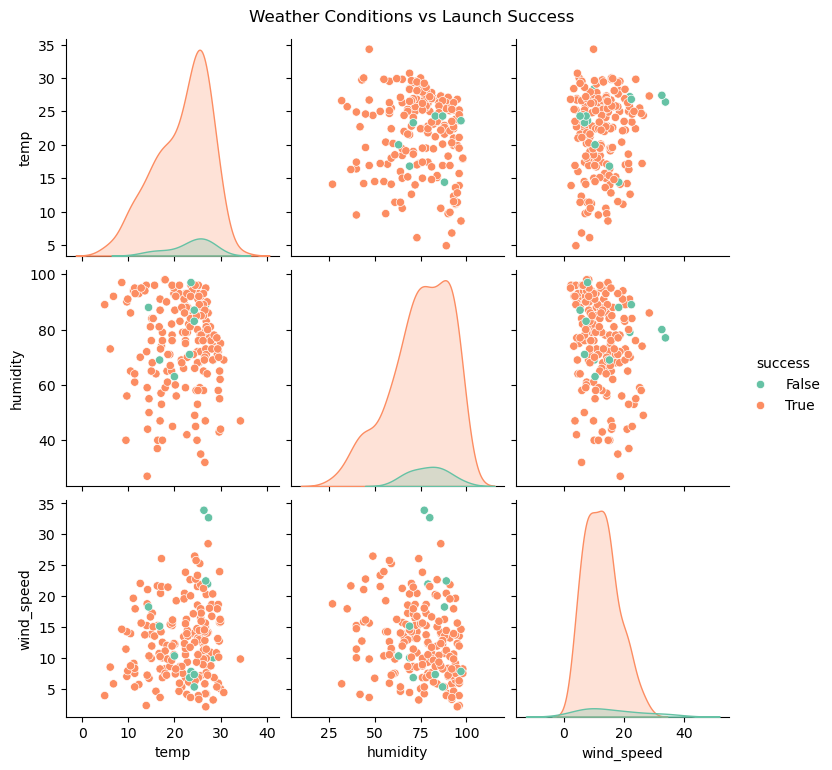

In [585]:
sns.pairplot(df, vars=['temp', 'humidity', 'wind_speed'], hue='success', palette='Set2')
plt.suptitle('Weather Conditions vs Launch Success', y=1.02)
plt.show()